# Demo 1: spectral parameterization (FOOOF) + simulation of neural data (neurodsp)
- A more comprehensive set of tutorials here: https://fooof-tools.github.io/fooof/auto_tutorials/index.html

If using on Colab, need to run the next line to import the necessary packages

In [1]:
# !pip install fooof neurodsp

In [2]:
ON_COLAB = False
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

cur_dir = 'https://raw.githubusercontent.com/rdgao/specparam-sbi/main/demo_notebooks/' if ON_COLAB else './'
plt.style.use(cur_dir + '/matplotlibrc_notebook.mplstyle')
# plt.style.use('./matplotlibrc_notebook.mplstyle')
# plt.style.use('./images/presentation.mplstyle')

### Generate some synthetic data
(if you are running on Colab)

In [3]:
# # generate data
# import fooof
# f_range = [1,500]
# f_res = 0.5
# ap_params = [1,100,3]
# osc_params = [30,1.5,6]
# noise_level = 0.05
# freqs, psd = fooof.sim.gen_power_spectrum(f_range, ap_params, osc_params, noise_level, f_res)
# plt.loglog(freqs, psd)
# np.savez('psd_example', freqs=freqs, psd=psd)

### Load the data: we just need a frequency axis and the power spectrum values to start.

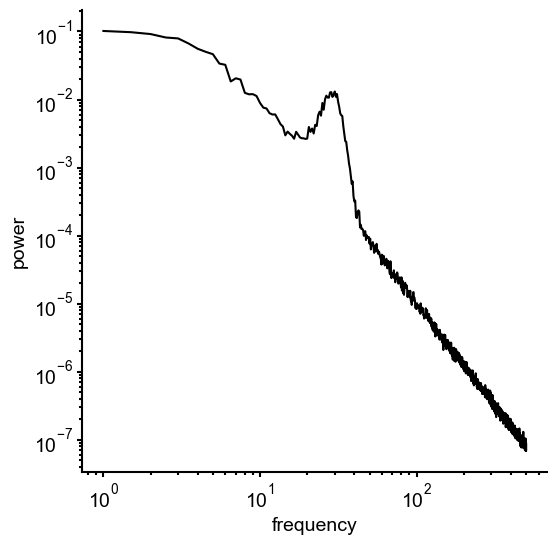

In [4]:
plt.figure(figsize=(6,6))
psd_data = np.load('psd_example.npz')
freqs, psd = psd_data['freqs'], psd_data['psd']
plt.loglog(freqs, psd)
plt.xlabel('frequency'); plt.ylabel('power');

---
# 1: 0 to FOOOFed in 3 lines of code

/var/folders/x7/7mxz7r0x2dn1n4_xxtp8xgx00000gn/T/ipykernel_1494/799722662.py:1: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  import fooof



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  

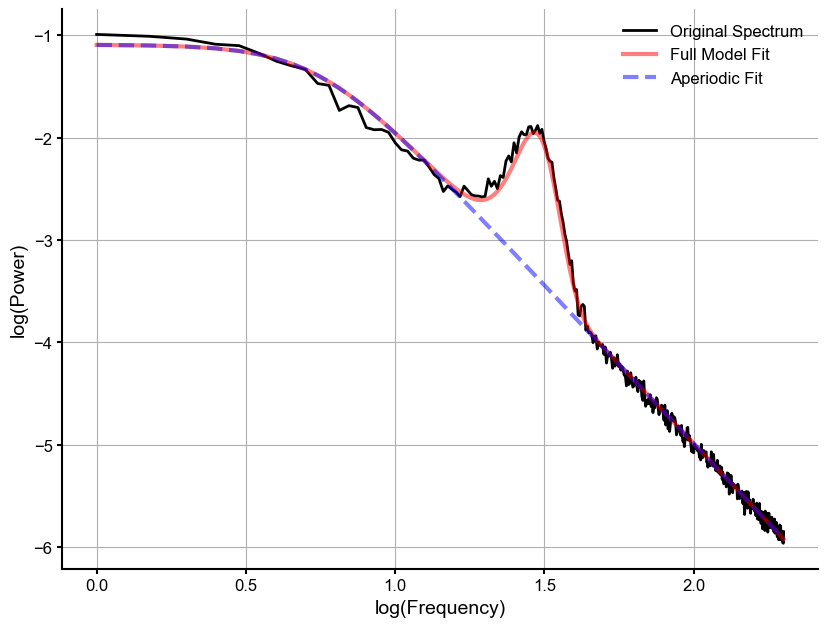

In [5]:
import fooof
fg = fooof.FOOOF(max_n_peaks=3, min_peak_height=.5, aperiodic_mode='knee')
fg.fit(freqs, psd, freq_range=[1,200])
fg.report(plt_log=True)

### A report is automatically produced to show the model fit, and various estimated parameters and errors.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 200 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

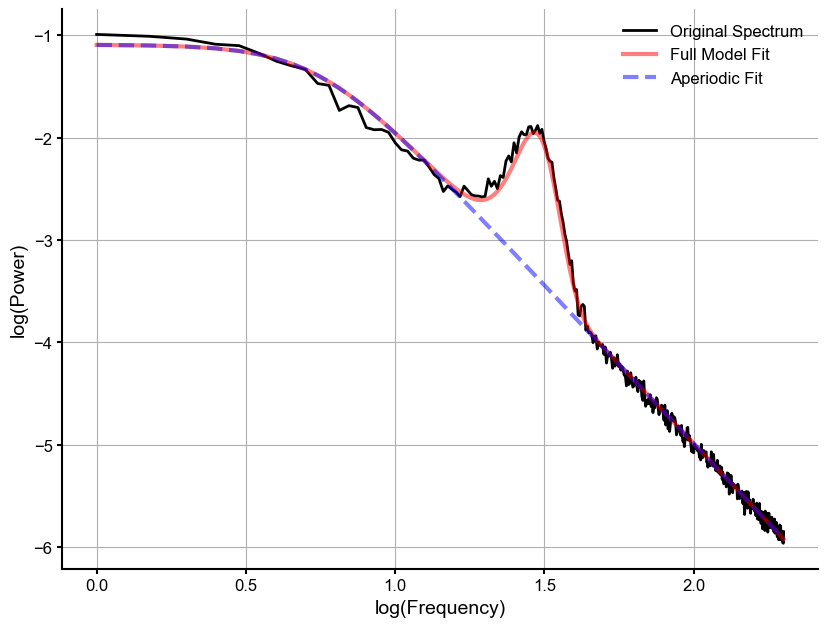

In [6]:
fg.report(plt_log=True)

In [7]:
fg.print_results()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 200 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     1.2012, 197.0035, 3.0944                                     
                                                                                                  
                                       1 peaks were found:                                        
          

### We can plot the two fitted components separately.

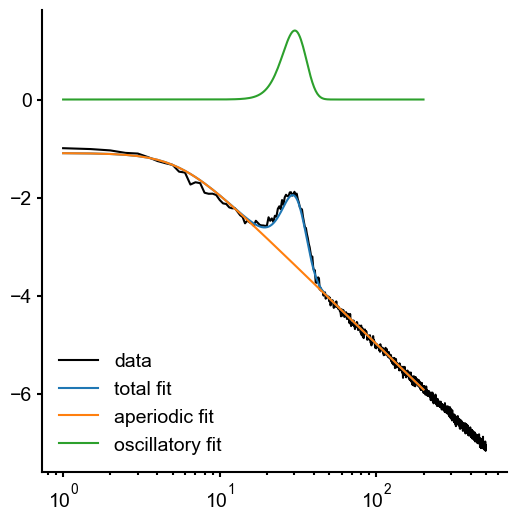

In [8]:
plt.figure(figsize=(6,6))
plt.plot(freqs, np.log10(psd), label='data')
plt.plot(fg.freqs, fg.fooofed_spectrum_, label='total fit')
plt.plot(fg.freqs, fg._ap_fit, label='aperiodic fit')
plt.plot(fg.freqs, fg._peak_fit, label='oscillatory fit')
plt.xscale('log')
plt.legend()

### We can extract the fit paramters in a numpy array for further analyses.

In [9]:
fg.get_results()

FOOOFResults(aperiodic_params=array([  1.20115144, 197.00352965,   3.09443011]), peak_params=array([[30.15131921,  1.40761546, 10.63125726]]), r_squared=0.99754999874682, error=0.052348336597397675, gaussian_params=array([[30.15131921,  1.40818591,  5.31562863]]))

In [10]:
# Or retrieve by individual component of interest
for p in ['aperiodic_params', 'peak_params', 'gaussian_params', 'error', 'r_squared']:
    print(f"{p}: {fg.get_params(p)}")
    
# # or access via
# [fg.aperiodic_params_, fg.gaussian_params_, fg.error_, fg.r_squared_]

aperiodic_params: [  1.20115144 197.00352965   3.09443011]
peak_params: [[30.15131921  1.40761546 10.63125726]]
gaussian_params: [[30.15131921  1.40818591  5.31562863]]
error: 0.052348336597397675
r_squared: 0.99754999874682


# We can also start from (simulated) time series.

In [11]:
from neurodsp import sim
from scipy import signal

In [12]:
# Settings for simulation time.
n_seconds = 60
fs = 1000
t_ker=1.

# Exc parameters
n_neurons_E = 1000
firing_rate_E = 1
tau_r_E=0.0
tau_d_E=0.05

# simulating the LFP from just one population
t = np.arange(0,n_seconds, 1/fs)
aperiodic = sim.sim_synaptic_current(n_seconds, fs, n_neurons_E, firing_rate_E, tau_r_E, tau_d_E, t_ker)
periodic = sim.sim_oscillation(n_seconds, fs, 60, 'asine', rdsym=0.75)*0.1 # sprinkle a little oscillation too
lfp = aperiodic + periodic

### Plot the time series and PSD.

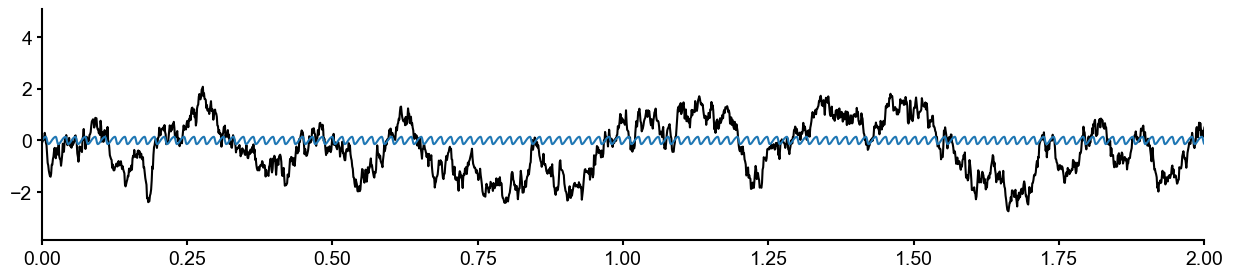

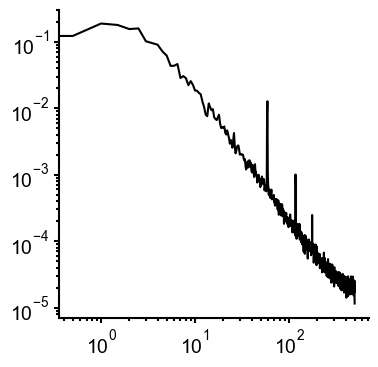

In [13]:
plt.figure(figsize=(15,3))
plt.plot(t,lfp)
plt.plot(t,periodic)
plt.xlim([0,2])

plt.figure()
freqs, psd = signal.welch(lfp, fs=fs, nperseg=fs*2, noverlap=fs, window='hamming')
plt.loglog(freqs, psd)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  

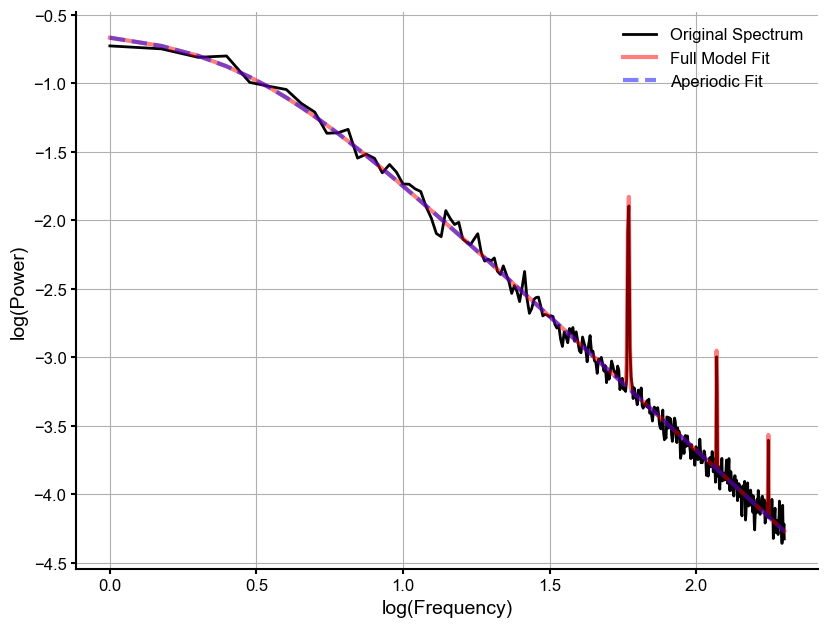

In [14]:
fg = fooof.FOOOF(max_n_peaks=3, min_peak_height=.5, aperiodic_mode='knee')
fg.fit(freqs, psd, freq_range=[1,200])
fg.report(plt_log=True)

---
# 2. Group Object
We can also run fits on many PSDs simultaneously.

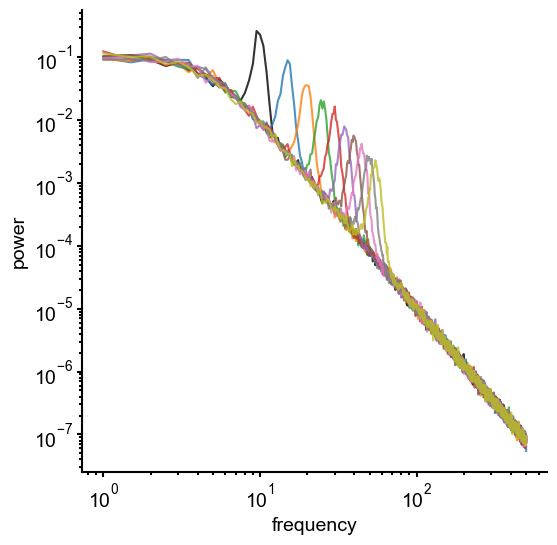

In [15]:
# First generate 10 "channels" of data
f_range = [1,500]
f_res = 0.5
ap_params = [1,100,3]
osc_params = [30,1.5,6]
noise_level = 0.05

psds = []
for osc_freq in np.arange(10,60,5):
    osc_params[0] = osc_freq # Change frequency
    osc_params[2] = osc_freq/10 # Change bandwidth
    freqs, psd = fooof.sim.gen_power_spectrum(f_range, ap_params, osc_params, noise_level, f_res)
    psds.append(psd)
    
psds = np.array(psds)
plt.figure(figsize=(6,6))
plt.loglog(freqs, psds.T, alpha=0.8);
plt.xlabel('frequency'); plt.ylabel('power');

Running FOOOFGroup across 10 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 10 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
          

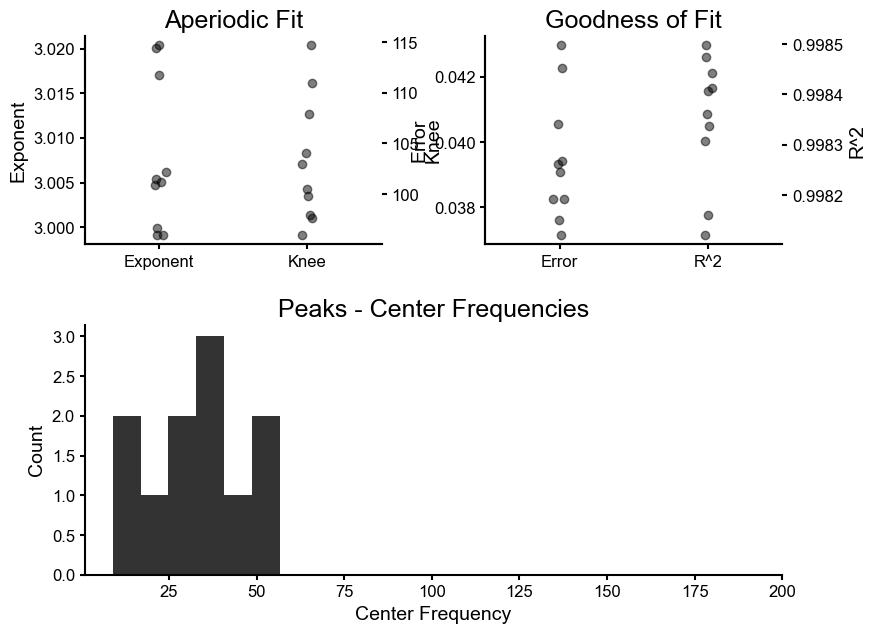

In [16]:
fg = fooof.FOOOFGroup(max_n_peaks=3, min_peak_height=.5, aperiodic_mode='knee')
fg.fit(freqs, psds, freq_range=[1,200])
fg.report()

Retrieving the fits is the same:

In [17]:
print(fg.get_params('aperiodic_params'))

[[  1.00928891 104.09812047   3.00507451]
 [  1.04532307 114.70163144   3.02037035]
 [  1.01141408 102.98000455   3.00618018]
 [  1.0390151  110.93692259   3.02007157]
 [  1.03745237 107.87394705   3.01699177]
 [  1.01042333  95.97194967   3.00538139]
 [  1.01119849  97.61776575   3.00475868]
 [  1.00186337 100.53524294   2.9999481 ]
 [  0.99944439  97.90855899   2.99917757]
 [  0.99769855  99.8084245    2.99915043]]


### Convenience function to return the fits in a pandas Dataframe!

In [18]:
fg.to_df(3)

,offset,knee,exponent,cf_0,pw_0,bw_0,cf_1,pw_1,bw_1,cf_2,pw_2,bw_2,error,r_squared
0,1.009289,104.098120,3.005075,9.990881,1.463520,1.916314,NaN,NaN,NaN,NaN,NaN,NaN,0.038243,0.998337
1,1.045323,114.701631,3.020370,15.041294,1.438888,2.895390,NaN,NaN,NaN,NaN,NaN,NaN,0.038255,0.998406
2,1.011414,102.980005,3.006180,19.965741,1.496097,3.839988,NaN,NaN,NaN,NaN,NaN,NaN,0.039323,0.998361
3,1.039015,110.936923,3.020072,25.068631,1.475156,4.766749,NaN,NaN,NaN,NaN,NaN,NaN,0.040566,0.998307
4,1.037452,107.873947,3.016992,30.006890,1.515134,5.751623,NaN,NaN,NaN,NaN,NaN,NaN,0.039422,0.998414
5,1.010423,95.971950,3.005381,35.011418,1.505551,6.893589,NaN,NaN,NaN,NaN,NaN,NaN,0.037613,0.998474
6,1.011198,97.617766,3.004759,40.022120,1.500279,7.836178,NaN,NaN,NaN,NaN,NaN,NaN,0.037163,0.998498
7,1.001863,100.535243,2.999948,44.917100,1.485605,9.043429,NaN,NaN,NaN,NaN,NaN,NaN,0.042265,0.998160
8,0.999444,97.908559,2.999178,40.333697,0.246941,3.437236,50.066004,1.499316,9.674177,NaN,NaN,NaN,0.039092,0.998442
9,0.997699,99.808424,2.999150,55.034524,1.507927,10.929614,NaN,NaN,NaN,NaN,NaN,NaN,0.042964,0.998121


---
# 3. Hyperparameter exploration
There are some important hyperparameters whose value should depend on what kind of data you have (i.e., what your PSD looks like).

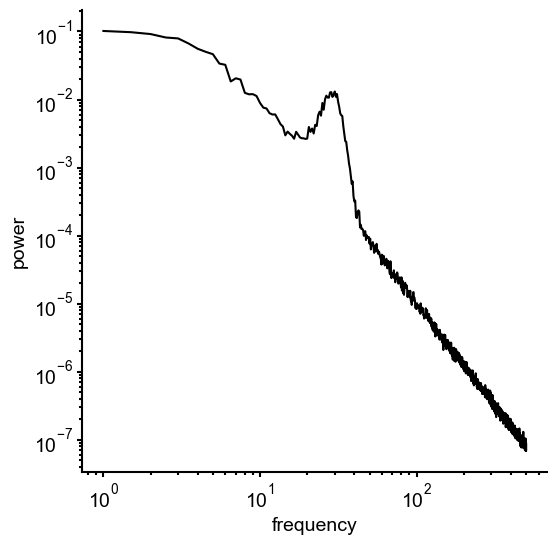

In [19]:
# Load the previous data again
plt.figure(figsize=(6,6))
psd_data = np.load('psd_example.npz')
freqs, psd = psd_data['freqs'], psd_data['psd']
plt.loglog(freqs, psd)
plt.xlabel('frequency'); plt.ylabel('power');

In [20]:
APERIODIC_MODE = 'knee' # Pure power law ('fixed') or Lorentzian ('knee')
PEAK_WIDTH_LIMIT = (0.5, 10) # Acceptable oscillation peak width range
MAX_N_PEAKS = 10 # Max number of peaks to fit
MIN_PEAK_HEIGHT = 1. # Minimum absolute peak height that will be detected
PEAK_THRESHOLD = 1. # Relative threshold for detecting peaks (in terms of noise std)
FIT_RANGE = [1,200] # Frequency range to fit over


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  

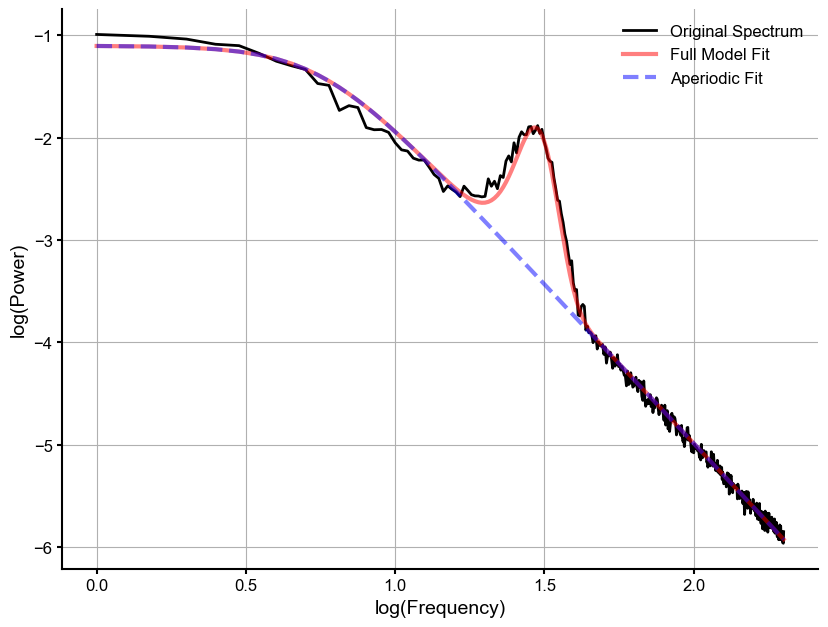

In [21]:
fg = fooof.FOOOF(
    aperiodic_mode=APERIODIC_MODE,
    peak_width_limits=PEAK_WIDTH_LIMIT,
    max_n_peaks=MAX_N_PEAKS,
    min_peak_height=MIN_PEAK_HEIGHT,
    peak_threshold=PEAK_THRESHOLD,
)
fg.fit(freqs, psd, freq_range=FIT_RANGE)
fg.report(plt_log=True)

### Some very cool interactive tools for fiddling before fitting final models
- From Ryan Hammonds (PhD student with Brad Voytek at UCSD): https://ryanhammonds.github.io/specparam-rs/simulator.html
- From Michael Valiadis & Farzin Negahbani (PhD students with Alireza Gharabaghi at Uni Tuebingen): https://github.com/Farzin-Negahbani/NeNa_aperiodic_GUI/tree/main

Lastly, a recent set of tutorials from the current Voytek lab, on specparam and much more: https://github.com/voytekresearch/spr2022